# SynthText

In [1]:
import sys
sys.path.append('../../')

from dl.data.txtdetn import datasets, target_transforms, transforms
%load_ext autoreload
%autoreload 2

In [2]:
augmentation = None

ignore = target_transforms.Ignore(strange=True)

transform = transforms.Compose(
    [#transforms.Resize((640, 640)),
     transforms.ToTensor(),]
     #transforms.Normalize(rgb_means=(0.485, 0.456, 0.406), rgb_stds=(0.229, 0.224, 0.225))]
)
target_transform = target_transforms.Compose(
    [target_transforms.Text2Number(class_labels=datasets.SynthText_char_labels_without_upper_blank, ignore_nolabel=False),
     target_transforms.ToTensor(textTensor=True)]
)

train_dataset = datasets.SynthTextDetectionDataset(ignore=ignore, transform=transform, target_transform=target_transform, augmentation=augmentation,
                                                   onlyAlphaNumeric=False)


In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2

from dl.data.utils.converter import toVisualizeQuadsRGBimg

time
you
played
so
fine
trw
apr


<IPython.core.display.Javascript object>


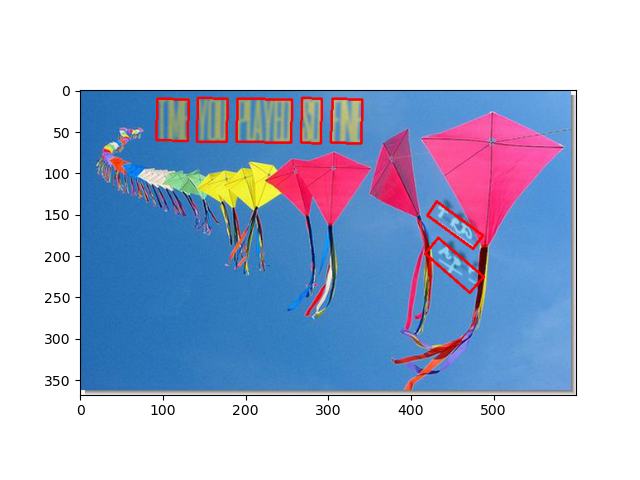

looked
pretty
good
there.
but
then
neither
used
to
seeing
for
both
make
dod
cap
key
and
the
newsgroups:


<IPython.core.display.Javascript object>


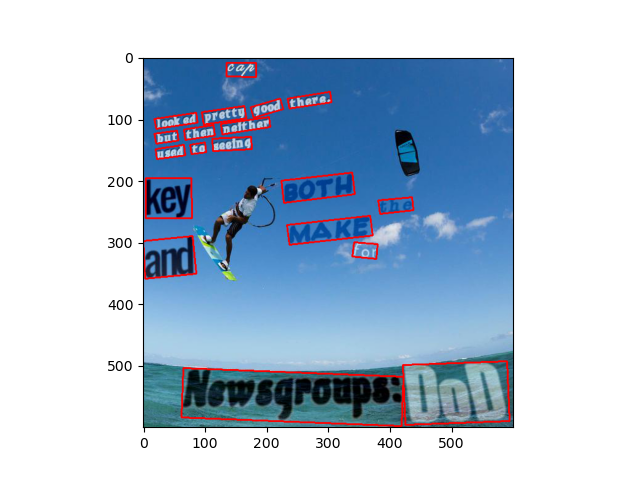

map.
mars
launched
will
martian
effects
nci
result
effects
of
the


<IPython.core.display.Javascript object>


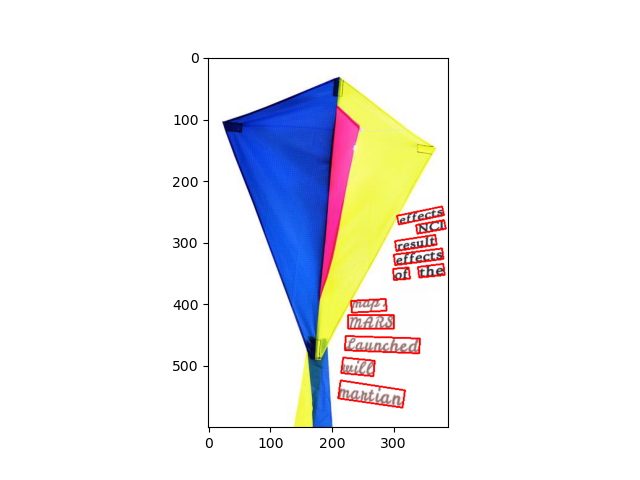

hill
(such
the


<IPython.core.display.Javascript object>


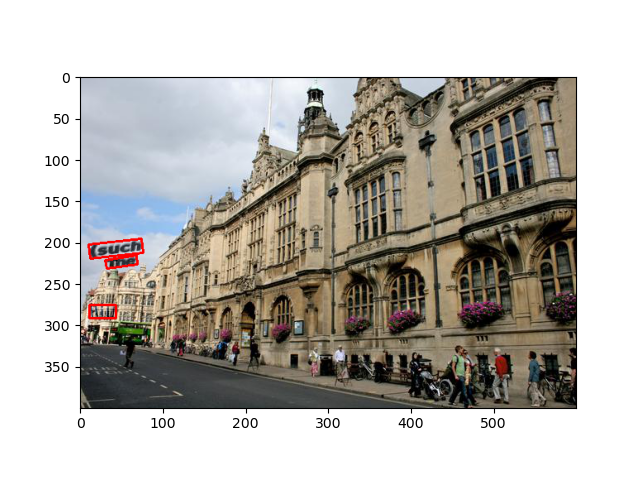

In [4]:
indices = [1, 100, 150, 10000]

for index in indices:
    img, targets, texts = train_dataset[index]
    
    for txt in texts:
        print(''.join([datasets.SynthText_char_labels_without_upper_blank[c.item()] for c in txt]))
    
    locs = targets[:, 4:12]
    
    img = toVisualizeQuadsRGBimg(img, locs)#, , texts)
    
    plt.figure()
    plt.imshow(img)